# Sod's Shock tube

At the beginning, It is necessary to notice that Sod's test problem based on 1D compressible flow  and usually such kind of problem can be concluded as shock-wave problem. Gnerally speaking, for shock tube problem the motion of compressible fluids can be treated as inviscid fluid and it was Euler equation that dominated whole process. 

According to mass, linear momentum, and energy conservation law, the equation for shock tube can be wrote as:

$$\frac{\partial \bf{u}}{\partial t} + \frac{\partial \bf{f}}{\partial x} = 0\quad\quad(1)$$

Here, $\bf{u}$ and $\bf{f}$ represent conservation varaible and flux respectivly. One may pay attention to the detail that I have bolded these two letters cause they are vectors intead of scalar. Hence equation (1) was a vector equation for shock wave. In order to make this equation more clear. Let me rewrite it as:

$$\frac{\partial}{\partial t}\begin{bmatrix} \rho \\ \rho u \\ \rho e_T \end{bmatrix} + \frac{\partial}{\partial x}\begin{bmatrix} \rho u \\ \rho u^2 + p \\ (\rho e_T + p)u \end{bmatrix} = 0\quad\quad(2)$$

Equation (2) was still a vetor form but what if Someone desired to obtain a scalar form, so let me write it as below:

$$\Bigg \{ \begin{matrix} \frac{\partial \rho}{t} + \frac{\partial (\rho u)}{\partial x} = 0\quad\quad\quad(3) \\ \frac{\partial \rho u}{t} + \frac{\partial (\rho u^2 + p)}{\partial x} = 0\quad\quad(4) \\ \frac{\partial \rho e_T}{t} + \frac{\partial (\rho e_T + p)}{\partial x} = 0\quad\quad(5) \end{matrix}$$

And based on ideal gas equation of state, pressure can be depicted through other three variables.

Sod's background material indicate that:

$$ {\bf{u}} = \begin{bmatrix} u_1\\u_2\\u_3 \end{bmatrix}=\begin{bmatrix} \rho \\ \rho u \\ \rho e_T \end{bmatrix} \quad\quad(6)$$

Another condition required here is flux and flux should also be expressed with $u_1$, $u_2$ and $u_3$. So flux vetor obtained:

$${\bf{f}} = \begin{bmatrix} f_1 \\f_2\\f_3 \end{bmatrix} = \begin{bmatrix} u_2\\\frac{{u_2}^2}{u_1} + (\gamma-1)(u_3 - \frac{1}{2}\frac{{u_2}^2}{u_1}) \\ (u_3 + (\gamma-1)(u_3-\frac{1}{2}\frac{{u_2}^2}{u_1}))\frac{u_2}{u_1} \end{bmatrix}\quad\quad(7)$$

## The Richtmyer method for this Riemann problem:

Richtmyer is a $\it{two-step}$ method, given by (scalar form):

$${u_{1,2,3}}_{i+\frac{1}{2}}^{n+\frac{1}{2}} = \frac{1}{2}({u_{1,2,3}}_{i+1}^{n}) - \frac{\Delta t}{2\Delta x}({f_{1,2,3}}_{i+1}^{n}-{f_{1,2,3}}_{i}^{n})\quad\quad(8)$$

$${u_{1,2,3}}_{i}^{n+1} = {u_{1,2,3}}_{i}^{n} - \frac{\Delta t}{\Delta x}({f_{1,2,3}}_{i+\frac{1}{2}}^{n+\frac{1}{2}}-{f_{1,2,3}}_{i-\frac{1}{2}}^{n+\frac{1}{2}})\quad\quad(9)$$

${u_{1,2,3}}$ indicates $u_1$, $u_2$, $u_3$ rspectivly. Like material mentioned,  this method is similar to $Maccormack-method$ equation (8) can be regarded as $predictor$ and equation (9) $corrector$

## Coding for Richtmyer method:


In [2]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
def init_density(rho_l,rho_r,nx):
   
    rho = rho_l*numpy.ones(nx)    #initial density for left-side
    
    rho[int((nx-1)/2):] = rho_r     #initial density for right-side
    
    return rho
    
def init_velocity(v_l,v_r,nx):
    
    v = v_l*numpy.ones(nx)    #initial velocity for left-side 
    
    v[int((nx-1)/2):] = v_r    #initial velocity for right-side
    
    return v

def init_pressure(p_l,p_r,nx):
    
    p = p_l*numpy.ones(nx)    #initial pressure for left-side
    
    p[int((nx-1)/2):] = p_r    #initial pressure for right-side
    
    return p

In [4]:
#Basic initial condition parameters
nx = 81    #number of steps in space 
dx = 0.25    #step-size in space
t = 0.01    #total time
dt = 0.0002    #step-size in time
nt = int(0.01/0.0002)+1    #number of steps in time
gamma = 1.4    #coefficient
rho_l = 1.0    #Left IC density
rho_r = 0.125    #Right IC density
v_l = 0.0    #Left IC velocity    
v_r = 0.0    #Right IC velovity
p_l = 100.0*1000.0 #Left IC for pressure 
p_r = 10.0*1000.0    #Right IC for pressure


x = numpy.linspace(-10.0,10.0,nx)


In [5]:
"""
This step is to calculate the flux for each conservation variable

"""
def F1(u2):
    
    return u2

def F2(u1,u2,u3,gamma):
    
    return u2**2/u1+(gamma-1)*(u3-0.5*u2**2/u1)

def F3(u1,u2,u3,gamma):
    
    return (u3+(gamma-1)*(u3-0.5*u2**2/u1))*u2/u1

In [6]:
def Rich(u1, u2, u3, dx, dt, nx, nt,gamma):
    u1_n = numpy.zeros((nt, nx))
    u1_n[:,:] = u1.copy()
    u1_star = numpy.empty_like(u1)
    u1_star = u1.copy()

    u2_n = numpy.zeros((nt, nx))
    u2_n[:,:] = u2.copy()
    u2_star = numpy.empty_like(u2)
    u2_star = u2.copy()

    u3_n = numpy.zeros((nt, nx))
    u3_n[:,:] = u3.copy()
    u3_star = numpy.empty_like(u3)
    u3_star = u3.copy()
    
    for i in range(1, nt):
        f1 = F1(u2)
        f2 = F2(u1, u2, u3,gamma)
        f3 = F3(u1, u2, u3,gamma)
        
         
        u1_star[:-1] = 0.5*(u1[:-1] + u1[1:]) - (dt/(2*dx))*(f1[1:] - f1[:-1])
        u2_star[:-1] = 0.5*(u2[:-1] + u2[1:]) - (dt/(2*dx))*(f2[1:] - f2[:-1])
        u3_star[:-1] = 0.5*(u3[:-1] + u3[1:]) - (dt/(2*dx))*(f3[1:] - f3[:-1])
        
         
        f1_star = F1(u2_star)
        f2_star = F2(u1_star, u2_star, u3_star,gamma)
        f3_star = F3(u1_star, u2_star, u3_star,gamma)
        
        
        u1_n[i,1:-1] = u1[1:-1] - (dt/dx)*(f1_star[1:-1] - f1_star[:-2])
        u2_n[i,1:-1] = u2[1:-1] - (dt/dx)*(f2_star[1:-1] - f2_star[:-2])
        u3_n[i,1:-1] = u3[1:-1] - (dt/dx)*(f3_star[1:-1] - f3_star[:-2])
        
        u1 = u1_n[i].copy()
        u2 = u2_n[i].copy()
        u3 = u3_n[i].copy()
        
       
    return u1_n, u2_n, u3_n

In [7]:
rho = init_density(rho_l,rho_r,nx)
v = init_velocity(v_l,v_r,nx)
p = init_pressure(p_l,p_r,nx)

u1 = rho    #set initial condition for u1 namely density
u2 = rho*v    #set initial condition for u2 namely density times velocity
u3 = p/(gamma-1) + rho*v**2/2    #set initial condition for u2 namely density times energy

u1_n,u2_n,u3_n = Rich(u1, u2, u3, dx, dt, nx, nt,gamma)
# u1_n, u2_n, u3_n corresponds denisty, density times velocity, and density times energy respectively

#At t = 0.01s which means index=50,the three fluxes should be:

u1_t = u1_n[50]
u2_t = u2_n[50]
u3_t = u3_n[50]

#Next it is time to calculate all three fluxes at x = 2.5m 
for i in range(len(x)):
    if x[i] == 2.5:
        n = i

rho = u1_t[n]    # calculate the desired density
print('The density at t = 0.01s, x = 2.5m is: {:.2f} kg/m^3.'.format(rho))

velocity = u2_t[n]/u1_t[n]
print('The velocity at t = 0.01s, x = 2.5m is: {:.2f} m/s.'.format(velocity))

pressure = (gamma-1)*(u3_t[n]-0.5*u2_t[n]**2/u1_t[n])
print('The pressure at t = 0.01s, x = 2.5m is: {:.2f} pa.'.format(pressure))

The density at t = 0.01s, x = 2.5m is: 0.37 kg/m^3.
The velocity at t = 0.01s, x = 2.5m is: 292.61 m/s.
The pressure at t = 0.01s, x = 2.5m is: 30250.89 pa.


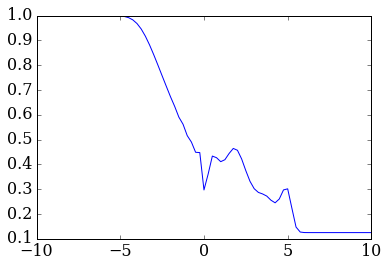

In [8]:
pyplot.plot(x,u1_t)

In [9]:
### Solving this problem with vector form

In [10]:
import numpy
from matplotlib import pyplot
%matplotlib inline
nt = int(0.01/0.0002)+1
nx = 81
dt = 0.0002
dx = 0.25
gamma = 1.4
x = numpy.linspace(-10.0,10.0,nx)

In [11]:
rho_i = numpy.ones(nx)
rho_i[40:] = 0.125
v_i = numpy.zeros(nx)
p_i = 100*1000*numpy.ones(nx)
p_i[40:] = 10*1000

In [12]:
def F(U):
    
    Fl = numpy.zeros_like(U)
    Fl[0] = U[1]
    Fl[1] = U[1]**2/U[0] + (gamma-1)*(U[2] - 0.5*U[1]**2/U[0])
    Fl[2] = (U[2] + (gamma-1)*(U[2] - 0.5*U[1]**2/U[0]))*U[1]/U[0]
    
    return Fl

In [13]:
def Rich(dt,dx,nt,nx,U):
    U_star = numpy.zeros_like(U)
    U_n = numpy.zeros((nt,3,nx))
    U_n[:,:] = U.copy()
    U_star = U.copy()      

    for i in range(1,51):
        
        Flux = F(U)
        U_star[:,:-1] = 0.5*(U[:,1:] + U[:,:-1]) - dt/(2*dx)*(Flux[:,1:] - Flux[:,:-1])
        Flux_star = F(U_star)
        U_n[i,:,1:-1] = U[:,1:-1] - dt/dx*(Flux_star[:,1:-1] - Flux_star[:,:-2])
        U = U_n[i].copy()
    
    return U_n

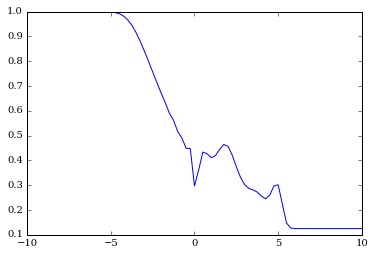

In [14]:
U = numpy.zeros((3,nx))
U[0] = rho_i
U[1] = rho_i*v_i
U[2] = p_i/(gamma-1)+0.5*rho_i*v_i**2

un = Rich(dt,dx,nt,nx,U)
pyplot.plot(x,un[50,0])

In [15]:
rho = un[50,0,50]
print('The density at t = 0.01s, x = 2.5m is: {:.2f} kg/m^3.'.format(rho))

v = un[50,1,50]/un[50,0,50]
print('The velocity at t = 0.01s, x = 2.5m is: {:.2f} m/s.'.format(velocity))

pressure = (gamma-1)*(un[50,2,50]-0.5*un[50,1,50]**2/un[50,0,50])
print('The pressure at t = 0.01s, x = 2.5m is: {:.2f} pa.'.format(pressure))

The density at t = 0.01s, x = 2.5m is: 0.37 kg/m^3.
The velocity at t = 0.01s, x = 2.5m is: 292.61 m/s.
The pressure at t = 0.01s, x = 2.5m is: 30250.89 pa.
